 taken from https://astrofrog.github.io/py4sci/
 
 expanded on by implimenting fit quality analysis (p-value) and estimating background contamination

# Particle Decay

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.optimize import curve_fit #simpliest scipy fitting method
import scipy.special as sf # needed for p-value calculation
from scipy.optimize import curve_fit

%matplotlib notebook


<IPython.core.display.Javascript object>


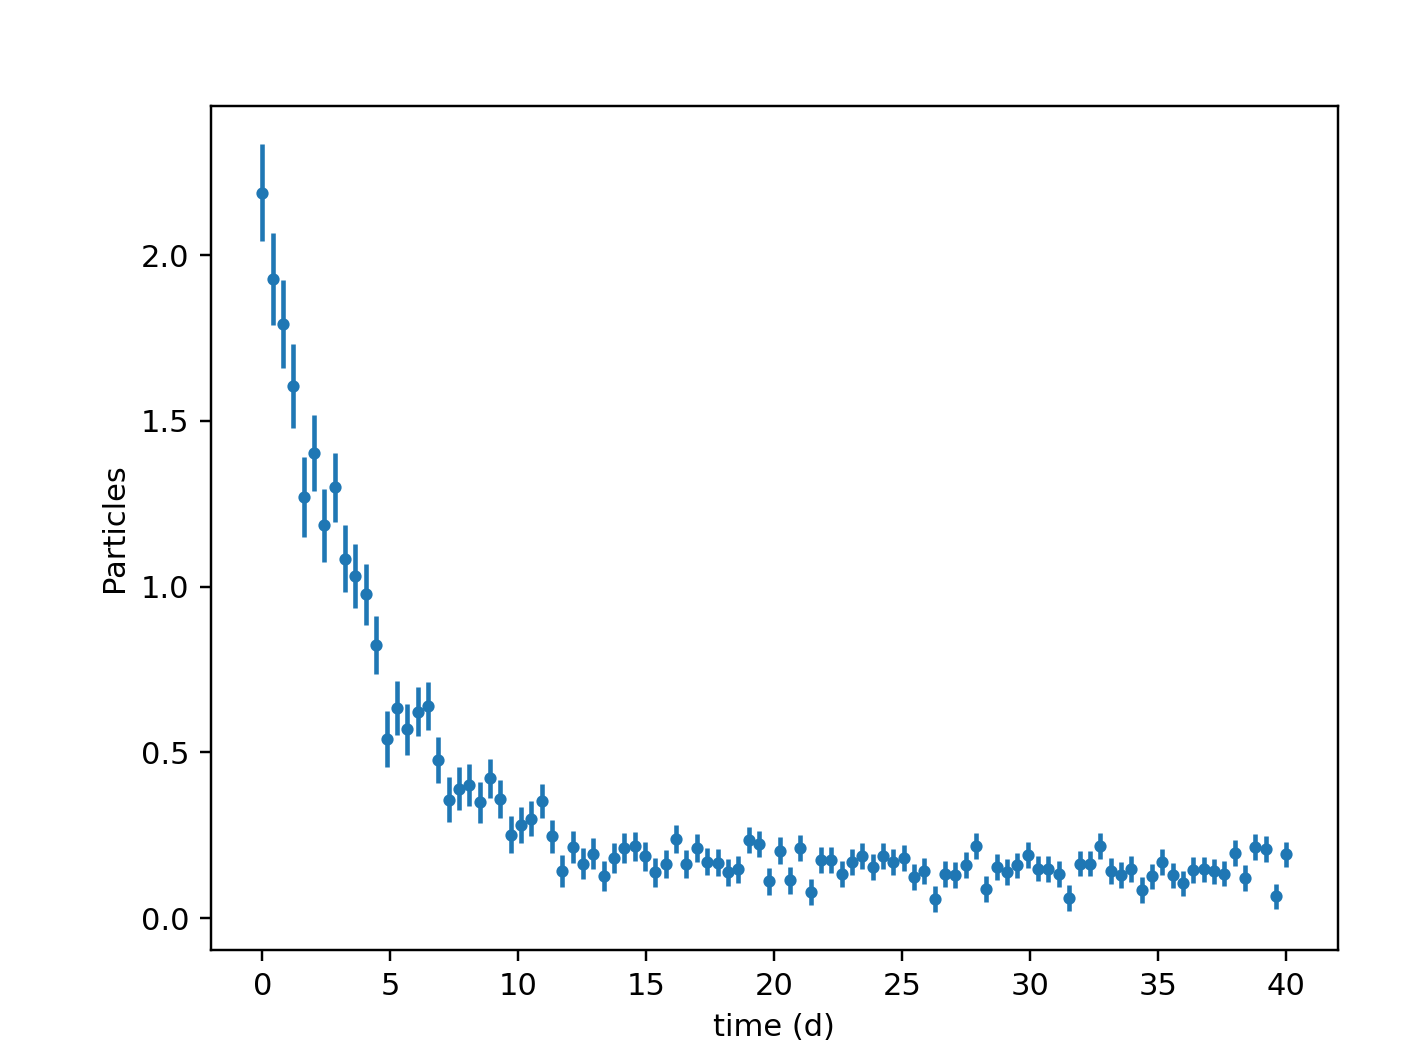

In [10]:
#read in data
t, N, N_error = np.loadtxt('data/decay_data.txt', unpack=True)

fig = plt.figure()
axes = fig.add_axes([0.15,0.1,0.8,0.8])

axes.errorbar(t, N, yerr = N_error, fmt='.')
axes.set_xlabel('time (d)')
axes.set_ylabel('Particles');

# Modify the Fit Function

Because it looks as though our data, which we beilive should follow an exponetial distribution is sitting on top of a background, a pure exponential fit may not describe the data well. Assuming that the background is a constant value write a function that returns an exponential with a constant background term added. Your function should take parameters:
* $t$ = time array
* $a$ = constant parameter to be determined by fitting
* $b$ = constant parameter to be determined by fitting
* bkg = constant parameter to be determined by fitting

and return the evaluation of $$a \cdot exp(-t/b) + bkg $$

In [19]:
###=====work needed=====###
def func_exp_bkg(t,a,b,bkg):
    return a*np.exp(-t/b) + bkg

### You should be able to fit the function by executing the cell below

In [20]:
###=====work needed=====###
popt2, pcov2 = curve_fit(func_exp_bkg, t, N, sigma=N_error, absolute_sigma=True)

In [21]:
print('Second fit:')
print(popt2)
print('\n')
print(pcov2)

Second fit:
[2.03895771 3.82202621 0.146625  ]


[[ 5.13987020e-03 -7.07479214e-03  4.42248403e-05]
 [-7.07479214e-03  2.06004028e-02 -3.32916925e-04]
 [ 4.42248403e-05 -3.32916925e-04  2.73710159e-05]]


In [22]:
Fit2_tau_error = pcov2[1,1]**0.5
Fit2_tau = popt2[1]
print('\n tau = ',Fit2_tau,'1/d +/-', Fit2_tau_error,' 1/d')

Fit2_t = popt2[1]*np.log(2)
Fit2_t_error = Fit2_t * np.sqrt((Fit2_tau_error/Fit2_tau)**2)
print('\n Half live = ', Fit2_t, 'd +/- ', Fit2_t_error,' d \n')


 tau =  3.822026205845453 1/d +/- 0.14352840415712165  1/d

 Half live =  2.649226688608001 d +/-  0.09948630867177721  d 



## Complete the code block below to draw the data and fit result on the same plot

<IPython.core.display.Javascript object>


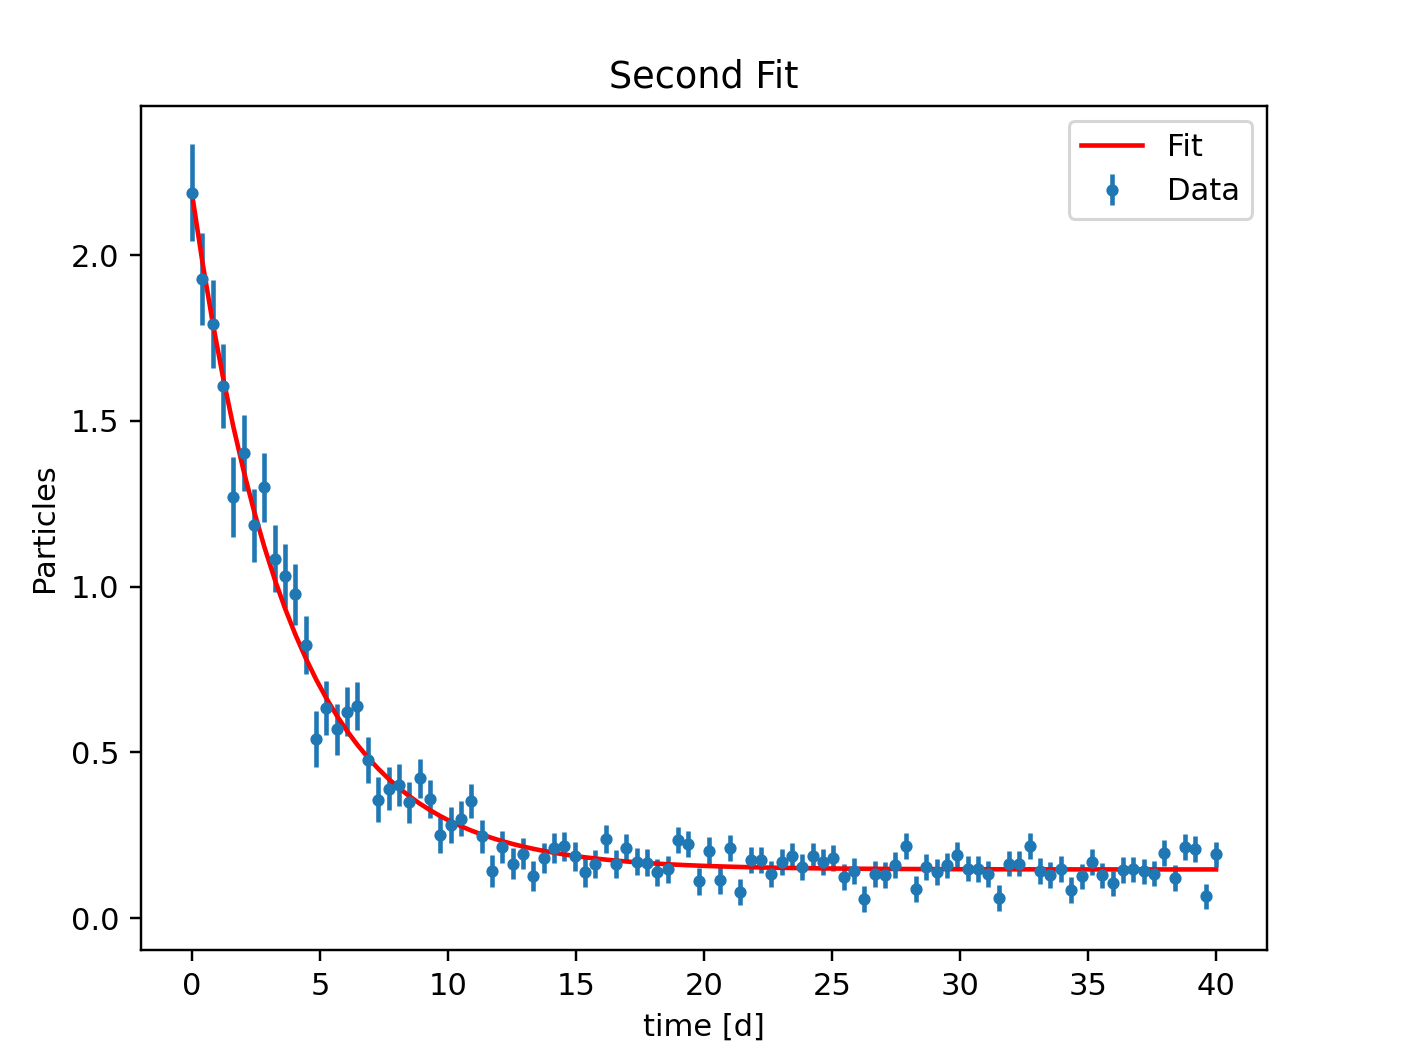

In [15]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.errorbar(t, N, yerr= N_error, fmt='.', label = 'Data')
axes.plot(t, func_exp_bkg(t, *popt2),'r-',label = 'Fit')

axes.set_title('Second Fit')
axes.set_xlabel('time [d]')
axes.set_ylabel('Particles')
axes.legend();


### You can execute the code below to assess the fit via $\chi^2$ test and p-value

In [23]:
Fit1_chisq = np.sum( (N - func_exp_bkg(t,*popt2))**2/(N_error**2) )
dof = len(N) - len(popt2)

print('Fit 1 results:\n')
print(' chi2 = ',Fit1_chisq,'\n dof = ', dof, '\n reduced chi2 = ', Fit1_chisq/dof)


#p-value
#evaluate the p-value

Fit 1 results:

 chi2 =  100.93476476825121 
 dof =  97 
 reduced chi2 =  1.0405645852397032


In [27]:
Fit1_pvalue = sf.gammaincc(dof/2.0, Fit1_chisq/2.0)

print('Fit 2 results:\n')
print(' chi2 = ',Fit1_chisq,'\n dof = ', dof, '\n reduced chi2 = ', Fit1_chisq/dof, '\n p-value = ',Fit1_pvalue)

Fit 2 results:

 chi2 =  100.93476476825121 
 dof =  97 
 reduced chi2 =  1.0405645852397032 
 p-value =  0.37202466972848836
